## Figure 4

Kexin Dong

Last Update: Jan 23, 2026

## NOTE: NEED TO BE CLEANED.

In [1]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42   
mpl.rcParams['ps.fonttype'] = 42 
mpl.rcParams['text.usetex'] = False 
import bioh2m as h2m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import time
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
import seaborn as sns
from sklearn.decomposition import PCA
import os
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']

/Users/kexindong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/kexindong/Library/Python/3.9/lib/python/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
FOCUSED = pd.read_csv('MBESv2_focused.csv')

targ_guides = FOCUSED[(FOCUSED['classification']=='targeting guide')] # & (FOCUSED['legacy']==False)]
len(np.unique(targ_guides['gene_name_m']))

127

## 4b

In [ ]:
ABE = FOCUSED[FOCUSED['Editor']=='ABE']
CBE = FOCUSED[FOCUSED['Editor']=='CBE']

In [ ]:
len(ABE)

376

In [ ]:
len(ABE[ABE['classification']=='targeting guide'])

170

In [ ]:
376-170

206

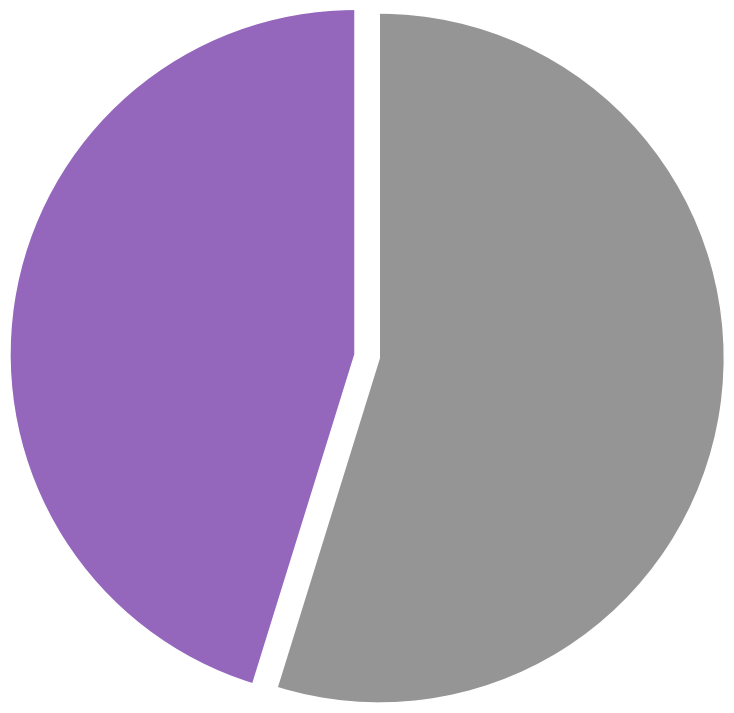

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal')
mypie, _ = ax.pie([170, 376-170], radius = 1.4, colors = ['tab:purple',plt.cm.Greys(.5)],
                  explode = (0,.1,), startangle=90)
plt.savefig('figures/ABE_focused_composition_pie.pdf', bbox_inches = 'tight', dpi=300)
plt.setp(mypie, edgecolor='white')
plt.show()

In [ ]:
len(CBE)

1257

In [ ]:
len(CBE[CBE['classification']=='targeting guide'])

782

In [ ]:
CBE['classification'].value_counts()

classification
targeting guide               782
non-targeting control         300
essential truncation guide    115
safe-targeting control         60
Name: count, dtype: int64

In [ ]:
1257-782

475

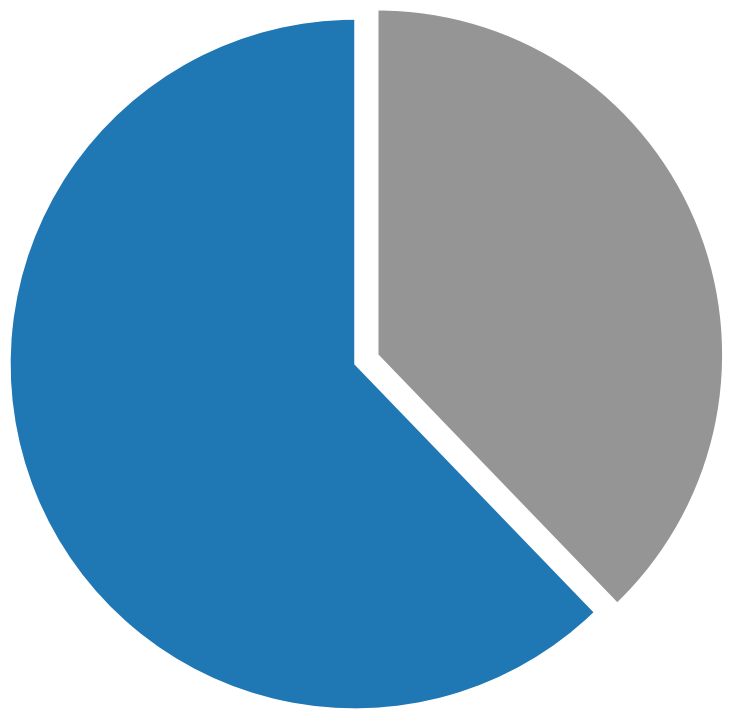

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal')
mypie, _ = ax.pie([782, 1257-782], radius = 1.4, colors = ['tab:blue',plt.cm.Greys(.5)],
                  explode = (0,.1,), startangle=90)
plt.savefig('figures/CBE_focused_composition_pie.pdf', bbox_inches = 'tight', dpi=300)
plt.setp(mypie, edgecolor='white')
plt.show()

## 4c

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


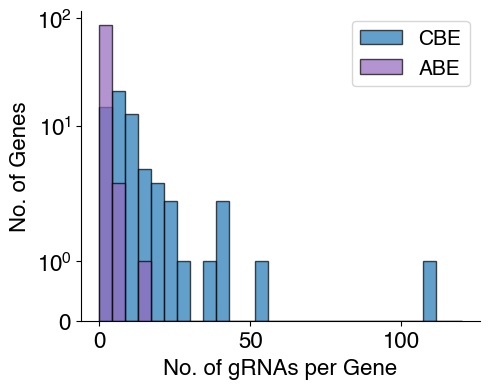

In [12]:

ABE = targ_guides[targ_guides['Editor']=='ABE']
CBE = targ_guides[targ_guides['Editor']=='CBE']

u, c = np.unique(CBE['gene_name_m'], return_counts=True)
u2, c2 = np.unique(ABE['gene_name_m'], return_counts=True)

#modify this so it's mutations and not guides...
fig, ax = plt.subplots(figsize=(5,4))
ax.hist(c, np.linspace(0,120,29), edgecolor='black', linewidth=1, label='CBE', alpha=.7, color='tab:blue')
ax.hist(c2, np.linspace(0,120,29), edgecolor='black', linewidth=1, label='ABE', alpha=.7, color='tab:purple')

#plt.yscale('log')

#dd = pd.DataFrame(dict(zip(['gene', 'gRNA count'], [u,c]))).sort_values(by='gRNA count', ascending=False)

#plt.plot(list(range(len(dd))), dd['gRNA count'])
ax.set_yscale('symlog')
ax.set_ylabel('No. of Genes', fontsize=16)
ax.set_xlabel('No. of gRNAs per Gene', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16);
ax.set_xticks([0,50,100])
ax.legend(fontsize=15)
ax.spines[['top', 'right']].set_visible(False)
plt.savefig('figures/figure4_focused_gRNA_per_gene_histogram.pdf', bbox_inches='tight')
fig.tight_layout()

In [9]:
ABE['gene_name_m'].value_counts()

gene_name_m
Trp53     14
Erbb3      7
Smad4      5
Myd88      5
Dnmt3a     4
          ..
Lyn        1
Map2k2     1
Myc        1
Ncoa3      1
Vhl        1
Name: count, Length: 90, dtype: int64

## 4d

In [3]:
fp = 'crispresso/focused'
ABE_BC_RAW = sorted(os.listdir(f'{fp}/ABE_BC'))
ABE_EPO_RAW = sorted(os.listdir(f'{fp}/ABE_EPO'))
# CBE_BC_RAW = sorted(os.listdir(f'{fp}/CBE_BC'))
# CBE_EPO_RAW = sorted(os.listdir(f'{fp}/CBE_EPO'))

#set filters for minimum number of sensor reads
min_sensor_reads = 100
name_dict = {'men':'Meninges', 'spleen':'Spleen', 'bm':'Bone Marrow', 'd5':'D5', 'd15':'D15', 'lib':'Plasmid', 'input':'Input (D0)'}

In [7]:
ABE = FOCUSED[(FOCUSED['Editor']=='ABE') & (FOCUSED['classification']=='targeting guide')]
# CBE = FOCUSED[(FOCUSED['Editor']=='CBE') & (FOCUSED['classification'].isin(['targeting guide']))]

In [8]:
t = []
corr = []
name = []

for i in ABE_BC_RAW:
    g = pd.read_csv(f'{fp}/ABE_BC/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
    #print(len(g))
    g2 = pd.merge(g, ABE, on='gRNA_id')
    #print(len(g2))
    g2 = g2[g2['Reads_aligned_all_amplicons']>=min_sensor_reads]
    t.append(np.average(g2['target_base_edit_perc']))
    corr.append(np.average(g2['corr_perc']))

list_samples = ['bm']*5+['d15']*5+['d5','input','lib']+['men']*5+['spleen']*5

In [9]:
name = [name_dict[x] for x in list_samples]
ABE_BC_editing1 = pd.DataFrame(dict(zip(['Sample', 'Editing %',], [name, t,])))
ABE_BC_editing2 = pd.DataFrame(dict(zip(['Sample', 'Editing %'], [name, corr])))
ABE_BC_editing1['Edit Type'] = 'Target Editing (w/ Bystanders)'
ABE_BC_editing2['Edit Type'] = 'Pure Correct Editing'
ABE_BC_EDITING = pd.concat((ABE_BC_editing1, ABE_BC_editing2))

In [10]:
i = 'input_compact_unfiltered.csv'
g = pd.read_csv(f'{fp}/ABE_EPO/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
g2 = pd.merge(g, ABE, on='gRNA_id')

In [11]:
t = []
corr = []
name = []

for i in ABE_EPO_RAW:
    print(i)
    g = pd.read_csv(f'{fp}/ABE_EPO/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
    g2 = pd.merge(g, ABE, on='gRNA_id')
    g2 = g2[g2['Reads_aligned_all_amplicons']>=min_sensor_reads]
    t.append(np.average(g2['target_base_edit_perc']))
    corr.append(np.average(g2['corr_perc']))

list_samples = ['bm']*5+['d15']*5+['d5','input','lib']+['men']*5+['spleen']*5

name = [name_dict[x] for x in list_samples]
ABE_EPO_editing1 = pd.DataFrame(dict(zip(['Sample', 'Editing %',], [name, t,])))
ABE_EPO_editing2 = pd.DataFrame(dict(zip(['Sample', 'Editing %'], [name, corr])))
ABE_EPO_editing1['Edit Type'] = 'Target Editing (w/ Bystanders)'
ABE_EPO_editing2['Edit Type'] = 'Pure Correct Editing'
ABE_EPO_EDITING = pd.concat((ABE_EPO_editing1, ABE_EPO_editing2))

bm1_compact_unfiltered.csv
bm2_compact_unfiltered.csv
bm3_compact_unfiltered.csv
bm4_compact_unfiltered.csv
bm5_compact_unfiltered.csv
d15-rep1_compact_unfiltered.csv
d15-rep2_compact_unfiltered.csv
d15-rep3_compact_unfiltered.csv
d15-rep4_compact_unfiltered.csv
d15-rep5_compact_unfiltered.csv
d5_compact_unfiltered.csv
input_compact_unfiltered.csv
lib_compact_unfiltered.csv
men1_compact_unfiltered.csv
men2_compact_unfiltered.csv
men3_compact_unfiltered.csv
men4_compact_unfiltered.csv
men5_compact_unfiltered.csv
spleen1_compact_unfiltered.csv
spleen2_compact_unfiltered.csv
spleen3_compact_unfiltered.csv
spleen4_compact_unfiltered.csv
spleen5_compact_unfiltered.csv


In [12]:
ABE_EPO_EDITING

,Sample,Editing %,Edit Type
0,Bone Marrow,84.267874,Target Editing (w/ Bystanders)
1,Bone Marrow,81.777630,Target Editing (w/ Bystanders)
2,Bone Marrow,79.392622,Target Editing (w/ Bystanders)
3,Bone Marrow,81.464935,Target Editing (w/ Bystanders)
4,Bone Marrow,85.275510,Target Editing (w/ Bystanders)
5,D15,81.859461,Target Editing (w/ Bystanders)
6,D15,83.632498,Target Editing (w/ Bystanders)
7,D15,84.709774,Target Editing (w/ Bystanders)
8,D15,83.194145,Target Editing (w/ Bystanders)
9,D15,81.773336,Target Editing (w/ Bystanders)


In [ ]:
t = []
corr = []
name = []

for i in CBE_BC_RAW:
    g = pd.read_csv(f'{fp}/CBE_BC/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
    g2 = pd.merge(g, CBE, on='gRNA_id')
    g2 = g2[g2['Reads_aligned_all_amplicons']>=min_sensor_reads]
    t.append(np.average(g2['target_base_edit_perc']))
    corr.append(np.average(g2['corr_perc']))
list_samples = ['bm']*3+['d15']*5+['d5']*5+['input']*5+['lib']+['men']*3+['spleen']*3

name = [name_dict[x] for x in list_samples]
CBE_BC_editing1 = pd.DataFrame(dict(zip(['Sample', 'Editing %',], [name, t,])))
CBE_BC_editing2 = pd.DataFrame(dict(zip(['Sample', 'Editing %'], [name, corr])))
CBE_BC_editing1['Edit Type'] = 'Target Editing (w/ Bystanders)'
CBE_BC_editing2['Edit Type'] = 'Pure Correct Editing'
CBE_BC_EDITING = pd.concat((CBE_BC_editing1, CBE_BC_editing2))

In [ ]:
t = []
corr = []
name = []

for i in CBE_BC_RAW:
    g = pd.read_csv(f'{fp}/CBE_BC/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
    g2 = pd.merge(g, CBE_NGG, on='gRNA_id')
    g2 = g2[g2['Reads_aligned_all_amplicons']>=min_sensor_reads]
    t.append(np.average(g2['target_base_edit_perc']))
    corr.append(np.average(g2['corr_perc']))
list_samples = ['bm']*3+['d15']*5+['d5']*5+['input']*5+['lib']+['men']*3+['spleen']*3

name = [name_dict[x] for x in list_samples]
CBE_BC_editing1_NGG = pd.DataFrame(dict(zip(['Sample', 'Editing %',], [name, t,])))
CBE_BC_editing2_NGG = pd.DataFrame(dict(zip(['Sample', 'Editing %'], [name, corr])))
CBE_BC_editing1_NGG['Edit Type'] = 'Target Editing (w/ Bystanders)'
CBE_BC_editing2_NGG['Edit Type'] = 'Pure Correct Editing'
CBE_BC_EDITING_NGG = pd.concat((CBE_BC_editing1_NGG, CBE_BC_editing2_NGG))

In [ ]:
t = []
corr = []
name = []

for i in CBE_EPO_RAW:
    g = pd.read_csv(f'{fp}/CBE_EPO/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
    g2 = pd.merge(g, CBE, on='gRNA_id')
    g2 = g2[g2['Reads_aligned_all_amplicons']>=min_sensor_reads]
    t.append(np.average(g2['target_base_edit_perc']))
    corr.append(np.average(g2['corr_perc']))
list_samples = ['bm']*5+['d15']*5+['d5']*5+['input']*5+['lib']+['men']*5+['spleen']*5

name = [name_dict[x] for x in list_samples]
CBE_EPO_editing1 = pd.DataFrame(dict(zip(['Sample', 'Editing %',], [name, t,])))
CBE_EPO_editing2 = pd.DataFrame(dict(zip(['Sample', 'Editing %'], [name, corr])))
CBE_EPO_editing1['Edit Type'] = 'Target Editing (w/ Bystanders)'
CBE_EPO_editing2['Edit Type'] = 'Pure Correct Editing'
CBE_EPO_EDITING = pd.concat((CBE_EPO_editing1, CBE_EPO_editing2))

In [ ]:
t = []
corr = []
name = []

for i in CBE_EPO_RAW:
    g = pd.read_csv(f'{fp}/CBE_EPO/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
    g2 = pd.merge(g, CBE_NGG, on='gRNA_id')
    g2 = g2[g2['Reads_aligned_all_amplicons']>=min_sensor_reads]
    t.append(np.average(g2['target_base_edit_perc']))
    corr.append(np.average(g2['corr_perc']))
list_samples = ['bm']*5+['d15']*5+['d5']*5+['input']*5+['lib']+['men']*5+['spleen']*5

name = [name_dict[x] for x in list_samples]
CBE_EPO_editing1_NGG = pd.DataFrame(dict(zip(['Sample', 'Editing %',], [name, t,])))
CBE_EPO_editing2_NGG = pd.DataFrame(dict(zip(['Sample', 'Editing %'], [name, corr])))
CBE_EPO_editing1_NGG['Edit Type'] = 'Target Editing (w/ Bystanders)'
CBE_EPO_editing2_NGG['Edit Type'] = 'Pure Correct Editing'
CBE_EPO_EDITING_NGG = pd.concat((CBE_EPO_editing1_NGG, CBE_EPO_editing2_NGG))

In [ ]:
CBE_EPO_EDITING['Sample'].unique()

array(['Bone Marrow', 'D15', 'D5', 'Input (D0)', 'Plasmid', 'Meninges',
       'Spleen'], dtype=object)

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(8,8), sharey=True, sharex=True)
order = ['Plasmid', 'Input (D0)', 'D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']

sns.barplot(data = ABE_BC_EDITING, y='Sample', x='Editing %', hue='Edit Type', ax=ax[0][0], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'], order=order)
sns.barplot(data = ABE_EPO_EDITING, y='Sample', x='Editing %', hue='Edit Type', ax=ax[0][1], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'],order=order)
sns.barplot(data = CBE_BC_EDITING_NGG, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1][0], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'], order=order)
sns.barplot(data = CBE_EPO_EDITING_NGG, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1][1], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'],order=order)

sns.stripplot(data = ABE_BC_EDITING, y='Sample', x='Editing %', hue='Edit Type', ax=ax[0][0], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'], order=order, dodge=True, s=5)
sns.stripplot(data = ABE_EPO_EDITING, y='Sample', x='Editing %', hue='Edit Type', ax=ax[0][1], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'],order=order, dodge=True, s=5)
sns.stripplot(data = CBE_BC_EDITING_NGG, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1][0], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'], order=order, dodge=True, s=5)
sns.stripplot(data = CBE_EPO_EDITING_NGG, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1][1], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'],order=order, dodge=True, s=5)

ax[0][0].legend([],[], frameon=False)
ax[0][1].legend([],[], frameon=False)
ax[1][0].legend([],[], frameon=False)
ax[1][1].legend([],[], frameon=False)

ax[0][0].set_ylabel('')
ax[1][0].set_ylabel('')
ax[0][0].set_xticks([0,20,40,60,80,100])

ax[0][0].spines[['top', 'right']].set_visible(False)
ax[0][0].tick_params(axis='both', which='major', labelsize=16,)
ax[1][0].spines[['top', 'right']].set_visible(False)
ax[1][0].tick_params(axis='both', which='major', labelsize=16,)


ax[0][0].set_title('ABE Barcoding', fontsize = 16)
ax[0][1].set_title('ABE EPO', fontsize = 16)
ax[1][0].set_title('CBE Barcoding (NGG only)', fontsize = 16)
ax[1][1].set_title('CBE EPO (NGG only)', fontsize = 16)

ax[1][0].set_xlabel('Editing %', fontsize=16)
ax[1][1].set_xlabel('Editing %', fontsize=16)

ax[0][1].spines[['top', 'right']].set_visible(False)
ax[0][1].tick_params(axis='both', which='major', labelsize=16,)
ax[1][1].spines[['top', 'right']].set_visible(False)
ax[1][1].tick_params(axis='both', which='major', labelsize=16,)
fig.tight_layout()
fig.savefig('figures/avg_editing_NGG.pdf')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


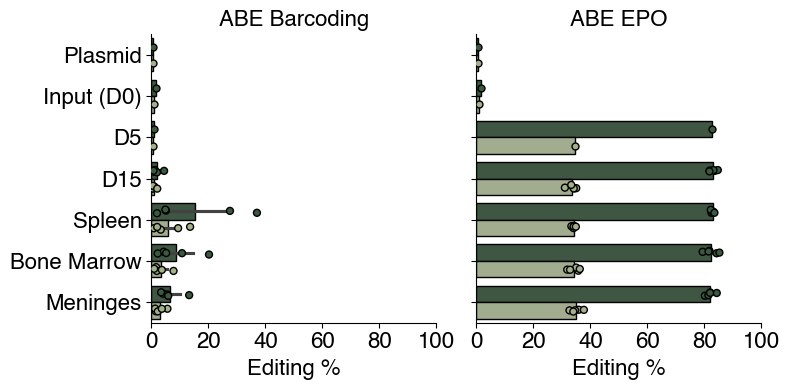

In [21]:
fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)
order = ['Plasmid', 'Input (D0)', 'D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']

sns.barplot(data = ABE_BC_EDITING, y='Sample', x='Editing %', hue='Edit Type', ax=ax[0], edgecolor='black', linewidth=1, palette = ['#3a5a40', '#a3b18a'], order=order)
sns.barplot(data = ABE_EPO_EDITING, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1], edgecolor='black', linewidth=1, palette = ['#3a5a40', '#a3b18a'],order=order)
#sns.barplot(data = CBE_BC_EDITING_NGG, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1][0], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'], order=order)
#sns.barplot(data = CBE_EPO_EDITING_NGG, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1][1], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'],order=order)

sns.stripplot(data = ABE_BC_EDITING, y='Sample', x='Editing %', hue='Edit Type', ax=ax[0], edgecolor='black', linewidth=1, palette = ['#3a5a40', '#a3b18a'], order=order, dodge=True, s=5)
sns.stripplot(data = ABE_EPO_EDITING, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1], edgecolor='black', linewidth=1, palette = ['#3a5a40', '#a3b18a'],order=order, dodge=True, s=5)
#sns.stripplot(data = CBE_BC_EDITING_NGG, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1][0], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'], order=order, dodge=True, s=5)
#sns.stripplot(data = CBE_EPO_EDITING_NGG, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1][1], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'],order=order, dodge=True, s=5)

ax[0].legend([],[], frameon=False)
ax[1].legend([],[], frameon=False)
# ax[1][0].legend([],[], frameon=False)
# ax[1][1].legend([],[], frameon=False)

ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[0].set_xticks([0,20,40,60,80,100])

ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=16,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=16,)

ax[0].set_title('ABE Barcoding', fontsize = 16)
ax[1].set_title('ABE EPO', fontsize = 16)
# ax[1][0].set_title('CBE Barcoding (NGG only)', fontsize = 16)
# ax[1][1].set_title('CBE EPO (NGG only)', fontsize = 16)

ax[0].set_xlabel('Editing %', fontsize=16)
ax[1].set_xlabel('Editing %', fontsize=16)

ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=16,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=16,)
fig.tight_layout()
fig.savefig('figures/fig4d.pdf')

## 4e

Correlation of LFC between ABE OG associated gRNAs and ABE Focused, for different tissues.